## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [258]:
y_train.shape[0]


60000

In [259]:
x_train.shape[0]

60000

In [260]:
x_test.shape[0]

10000

In [261]:
y_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [239]:
y_train.shape

(60000,)

In [187]:
x_train.shape

(60000, 28, 28)

In [188]:
x_test.shape

(10000, 28, 28)

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
[11:58 AM, 2/29/2020] Paridhi Gl: y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, num_classes)
[11:58 AM, 2/29/2020] Paridhi Gl: x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
[11:58 AM, 2/29/2020] Paridhi Gl: 
[11:58 AM, 2/29/2020] Paridhi Gl: x_train = x_train.reshape(60000, 28,28,1)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 28,28,1)

In [189]:
y_test.shape

(10000,)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes)
                    

In [0]:
y_test = keras.utils.to_categorical(y_test,num_classes)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(60000, 28,28,1)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 28,28,1)

In [269]:
x_train.shape
y_train.shape

(60000, 10)

### Import the necessary layers from keras to build the model

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
from keras.layers import Conv2D, MaxPooling2D
#input_shape = (28, 28, 1)

In [272]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
BATCH_SIZE = 32
EPOCHS = 10
num_classes =10

In [273]:
y_train.shape

(60000, 10)

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))



In [0]:
#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))




### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))



### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

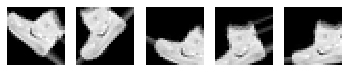

In [279]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
#from keras.optimizers import RMSprop
#from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('fashionmnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [208]:
x_train.shape

(60000, 28, 28, 1)

In [232]:
y_train.shape

(60000,)

In [233]:
y_test.shape

(10000,)

In [211]:
x_test.shape

(10000, 28, 28, 1)

In [283]:
model.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks= callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10





1875/1875 [==============================] - 30s 16ms/step - loss: 1.2283 - acc: 0.5433 - val_loss: 0.7167 - val_acc: 0.7158
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9468 - acc: 0.6461 - val_loss: 0.6336 - val_acc: 0.7601
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8740 - acc: 0.6719 - val_loss: 0.6012 - val_acc: 0.7730
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8236 - acc: 0.6919 - val_loss: 0.6151 - val_acc: 0.7615
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7922 - acc: 0.7033 - val_loss: 0.5818 - val_acc: 0.7790
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7588 - acc: 0.7168 - val_loss: 0.5753 - val_acc: 0.7784
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7422 - acc: 0.7227 - val_loss: 0.6104 - val_acc: 0.7571
Epoch 8/10
1875/1875 [===========================

###  Report the final train and validation accuracy

In [285]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 52us/step
Test loss: 0.5323115986347199
Test accuracy: 0.7941


In [286]:
#Testing the model on test set
score1 = model.evaluate(x_train, y_train)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 3s 50us/step
Test loss: 0.5323115986347199
Test accuracy: 0.7941


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
	
...
# create data generator
datagen_CIFAR = ImageDataGenerator()

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [289]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()


print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen1.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

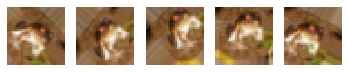

In [294]:
from matplotlib import pyplot as plt
gen = datagen1.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()